In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import datetime
from datetime import datetime

In [2]:
# Get current date in YYYY-MM-DD format
current_date = datetime.now().strftime('%Y-%m-%d')

In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [4]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
# Identify categorical columns
categorical_columns = df_train.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_columns))

Categorical columns: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']


In [10]:
# Identify numerical columns
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical columns:", list(numerical_columns))


Numerical columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [11]:
# Print value counts for each categorical column
print("\nValue counts for each categorical column:")
print("==========================================")
for categorical_column in categorical_columns:
    print(f"\nColumn: {categorical_column}")
    print(df_train[categorical_column].value_counts())
    print("Null values:", df_train[categorical_column].isnull().sum())
    print("------------------------------------------------------")


Value counts for each categorical column:

Column: PassengerId
PassengerId
0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: count, Length: 8693, dtype: int64
Null values: 0
------------------------------------------------------

Column: HomePlanet
HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64
Null values: 201
------------------------------------------------------

Column: CryoSleep
CryoSleep
False    5439
True     3037
Name: count, dtype: int64
Null values: 217
------------------------------------------------------

Column: Cabin
Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64
Null values: 199
------------------------------------------------------

Column: Destination
Destination
TRAPPIST-1e      5915


In [12]:
#Initialize transformers
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()

In [13]:
def get_categorical_numerical_columns(df):
    """Identify categorical and numerical columns"""
    # Get categorical and numerical columns
    categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

    # Exclude specific columns
    categorical_columns = [col for col in categorical_columns 
                         if col not in ['PassengerId', 'Name', 'Transported']]
    numerical_columns = [col for col in numerical_columns 
                        if col not in ['PassengerId', 'Transported']]

    return categorical_columns, numerical_columns


In [14]:
def process_numerical(df, is_training=True):
    """Handle missing values in numerical columns"""
    global num_imputer
    _, numerical_columns = get_categorical_numerical_columns(df)

    if not numerical_columns:
        return df

    if is_training:
        num_imputer = SimpleImputer(strategy='median')
        df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])
    else:
        df[numerical_columns] = num_imputer.transform(df[numerical_columns])

    return df


In [15]:
def scale_features(df, is_training=True):
    """Scale numerical features"""
    global scaler
    _, numerical_columns = get_categorical_numerical_columns(df)

    if not numerical_columns:
        return df

    if is_training:
        scaler = StandardScaler()
        df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    else:
        df[numerical_columns] = scaler.transform(df[numerical_columns])

    return df


In [16]:
def process_categorical(df, is_training=True):
    """Handle missing values and encode categorical columns"""
    global cat_imputer, encoder
    categorical_columns, _ = get_categorical_numerical_columns(df)

    if not categorical_columns:
        return df

    if is_training:
        # Impute missing values
        cat_imputer = SimpleImputer(strategy='most_frequent')
        df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

        # Encode categorical variables
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        encoded_features = encoder.fit_transform(df[categorical_columns])
    else:
        df[categorical_columns] = cat_imputer.transform(df[categorical_columns])
        encoded_features = encoder.transform(df[categorical_columns])

    # Create encoded DataFrame
    encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
    encoded_df = pd.DataFrame(
        encoded_features, 
        columns=encoded_feature_names, 
        index=df.index
    )

    # Drop original categorical columns and add encoded ones
    df = df.drop(columns=categorical_columns)
    df = pd.concat([df, encoded_df], axis=1)

    return df


In [17]:
def feature_engineering(df):
    """Create new features"""
    df = df.copy()

    # Extract group size from PassengerId
    df['Group'] = df['PassengerId'].str.split('_').str[0]
    df['GroupSize'] = df.groupby('Group')['PassengerId'].transform('count')

    # Split Cabin into deck, num, and side
    if 'Cabin' in df.columns:
        cabin_split = df['Cabin'].str.split('/', expand=True)
        if cabin_split is not None:
            df['Deck'] = cabin_split[0]
            df['CabinNum'] = cabin_split[1]
            df['Side'] = cabin_split[2]

    # Create total spending feature
    spending_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    existing_spending_columns = [col for col in spending_columns if col in df.columns]
    if existing_spending_columns:
        df['TotalSpending'] = df[existing_spending_columns].sum(axis=1)
        df['AvgSpending'] = df['TotalSpending'] / len(existing_spending_columns)

    # Convert boolean strings to integers
    if 'CryoSleep' in df.columns:
        df['CryoSleep'] = df['CryoSleep'].astype(str).map({'True': 1, 'False': 0})
    if 'VIP' in df.columns:
        df['VIP'] = df['VIP'].astype(str).map({'True': 1, 'False': 0})

    return df


In [18]:
def prepare_data(df, is_training=True):
    """Main function to prepare data"""
    # Create copy of dataframe
    df = df.copy()

    # Feature engineering
    df = feature_engineering(df)

    # Process numerical and categorical data
    df = process_numerical(df, is_training)
    df = scale_features(df, is_training)
    df = process_categorical(df, is_training)

    # Drop unnecessary columns
    columns_to_drop = ['Name', 'PassengerId', 'Cabin', 'Group']
    df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

    return df



In [19]:
df_train_processed = prepare_data(df_train.copy(), is_training=True)
df_test_processed = prepare_data(df_test.copy(), is_training=False)

In [20]:
df_train_processed.isnull().sum()

CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
               ..
CabinNum_997    0
CabinNum_998    0
CabinNum_999    0
Side_P          0
Side_S          0
Length: 14622, dtype: int64

In [21]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Columns: 14622 entries, CryoSleep to Side_S
dtypes: bool(1), float64(14621)
memory usage: 969.7 MB


In [22]:
df_test_processed.isnull().sum()

CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
               ..
CabinNum_997    0
CabinNum_998    0
CabinNum_999    0
Side_P          0
Side_S          0
Length: 14621, dtype: int64

In [23]:
df_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Columns: 14621 entries, CryoSleep to Side_S
dtypes: float64(14621)
memory usage: 477.1 MB


In [ ]:
#correlation_matrix_train = df_train_processed.corr()
#print(correlation_matrix_train)

In [32]:
#print("\nCorrelations with Transported:")
#print(correlation_matrix_train["Transported"].sort_values(ascending=False))


Correlations with Survived:
Survived        1.000000
Sex_female      0.543351
Title_Mrs       0.341994
Title_Miss      0.335636
Fare            0.257307
Embarked_C      0.168240
Title_Master    0.085221
Parch           0.081629
FamilySize      0.016639
Embarked_Q      0.003650
Title_Rare     -0.012054
SibSp          -0.035322
Age            -0.064910
Embarked_S     -0.149683
IsAlone        -0.203367
Pclass         -0.338481
Sex_male       -0.543351
Title_Mr       -0.549199
Name: Survived, dtype: float64


In [24]:
# # Heatmap visualization
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation Matrix Heatmap')
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()

In [25]:
# Prepare training data
X = df_train_processed.drop('Transported', axis=1)
y = df_train_processed['Transported']  # Binary classification target

In [26]:
# Save PassengerId from test data for submission
test_ids = df_test['PassengerId']
X_test = df_test_processed

print("Training features shape:", X.shape)
print("Training target shape:", y.shape)
print("Test features shape:", X_test.shape)

# Display feature information
print("\nFeature columns:", X.columns.tolist())
print("\nFirst few rows of training features:")
print(X.head())

Training features shape: (8693, 14621)
Training target shape: (8693,)
Test features shape: (4277, 14621)

Feature columns: ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'GroupSize', 'TotalSpending', 'AvgSpending', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Cabin_A/0/P', 'Cabin_A/0/S', 'Cabin_A/1/S', 'Cabin_A/10/P', 'Cabin_A/10/S', 'Cabin_A/100/S', 'Cabin_A/101/S', 'Cabin_A/102/S', 'Cabin_A/103/S', 'Cabin_A/104/S', 'Cabin_A/106/S', 'Cabin_A/107/S', 'Cabin_A/11/S', 'Cabin_A/13/P', 'Cabin_A/14/P', 'Cabin_A/14/S', 'Cabin_A/16/P', 'Cabin_A/16/S', 'Cabin_A/17/S', 'Cabin_A/18/P', 'Cabin_A/18/S', 'Cabin_A/19/P', 'Cabin_A/19/S', 'Cabin_A/2/P', 'Cabin_A/2/S', 'Cabin_A/20/P', 'Cabin_A/20/S', 'Cabin_A/21/P', 'Cabin_A/21/S', 'Cabin_A/22/P', 'Cabin_A/22/S', 'Cabin_A/23/P', 'Cabin_A/23/S', 'Cabin_A/24/P', 'Cabin_A/24/S', 'Cabin_A/25/P', 'Cabin_A/25/S', 'Cabin_A/26/S', 'Cabin_A/27/P', 'Cabin_A/27/S', 'Cabin_A/28/S', 'Cabin_A/29/P', 'Cabin_A/

In [27]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print("\nData split shapes:")
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Data split shapes:
Training set shape: (6954, 14621)
Validation set shape: (1739, 14621)
Test set shape: (4277, 14621)


In [35]:
### Train

In [28]:
# Cell 10: Train XGBoost model
import xgboost as xgb

In [29]:
# Define hyperparameters
hyperparameters = {
    'n_estimators': 500,
    'max_depth': 5,
    'learning_rate': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'random_state': 42,
    'tree_method': 'hist',
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': ['logloss', 'error'],  # Track both log loss and classification error
    'early_stopping_rounds': 20,
    'verbosity': 1
}

In [30]:
# Create and train the model
model = xgb.XGBClassifier(**hyperparameters)

# Fit with evaluation set
model.fit(
    X_train, 
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True
)

[0]	validation_0-logloss:0.68885	validation_0-error:0.39301	validation_1-logloss:0.68883	validation_1-error:0.39678
[1]	validation_0-logloss:0.68462	validation_0-error:0.22117	validation_1-logloss:0.68464	validation_1-error:0.21737
[2]	validation_0-logloss:0.68059	validation_0-error:0.20621	validation_1-logloss:0.68060	validation_1-error:0.20989
[3]	validation_0-logloss:0.67652	validation_0-error:0.19988	validation_1-logloss:0.67650	validation_1-error:0.20184
[4]	validation_0-logloss:0.67251	validation_0-error:0.19988	validation_1-logloss:0.67247	validation_1-error:0.20242
[5]	validation_0-logloss:0.66865	validation_0-error:0.19917	validation_1-logloss:0.66867	validation_1-error:0.20529
[6]	validation_0-logloss:0.66482	validation_0-error:0.19945	validation_1-logloss:0.66488	validation_1-error:0.20472
[7]	validation_0-logloss:0.66108	validation_0-error:0.20219	validation_1-logloss:0.66113	validation_1-error:0.20932
[8]	validation_0-logloss:0.65735	validation_0-error:0.19830	validation_1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric=['logloss', 'error'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [31]:
# Make predictions on validation set
y_pred = model.predict(X_val)

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Print model performance
print("\nModel Performance on Validation Set:")
print("====================================")
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Model Performance on Validation Set:

Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.75      0.79       863
        True       0.77      0.85      0.81       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



In [33]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))



Confusion Matrix:
[[643 220]
 [131 745]]


In [34]:
print("\nAccuracy Score:", accuracy_score(y_val, y_pred))



Accuracy Score: 0.7981598619896493


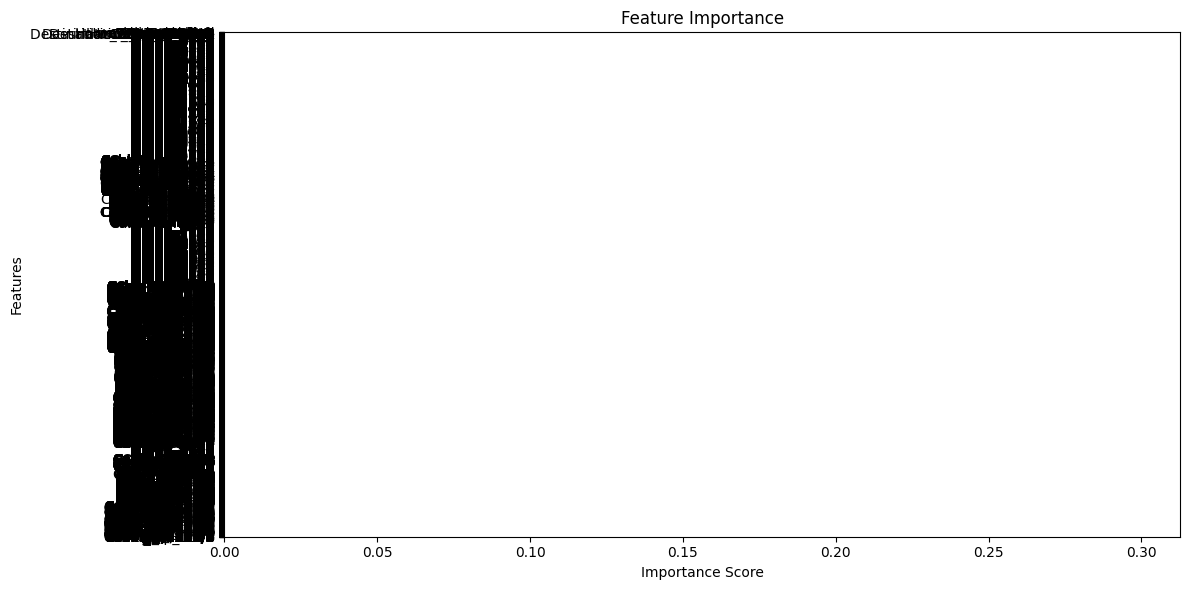

In [ ]:
import seaborn as sns
# Feature importance visualization
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# # Plot feature importance
# plt.figure(figsize=(12, 6))
# sns.barplot(x='importance', y='feature', data=feature_importance)
# plt.title('Feature Importance')
# plt.xlabel('Importance Score')
# plt.ylabel('Features')
# plt.tight_layout()
# plt.show()


In [71]:
# Make predictions on test set
test_predictions = model.predict(X_test)

In [72]:
# Create submission file with correct format
submission = pd.DataFrame({
    'PassengerId': test_ids,
    'Transported': test_predictions.astype(bool)  # Convert to boolean as per submission format
})

In [73]:
# Save processed training data with target
df_train_processed_with_target = X.copy()
df_train_processed_with_target['Transported'] = y
df_train_processed_with_target.to_csv(f'data-out/train-processed-{current_date}.csv', index=False)

# Save processed test data
X_test.to_csv(f'data-out/test-processed-{current_date}.csv', index=False)


In [74]:
# Save submission file
submission.to_csv(f'data-out/predictions-{current_date}.csv', index=False)
print(f"Saved submission to: data-out/predictions-{current_date}.csv")


Saved submission to: data-out/predictions-2024-12-16.csv


In [ ]:
# Print submission format verification
print("\nSubmission Format Verification:")
print("Shape:", submission.shape)
print("\nFirst few rows:")
print(submission.head())
print("\nValue counts for Transported:")
print(submission['Transported'].value_counts(normalize=True))

# Print feature importance summary
print("\nTop 10 most important features:")
print(feature_importance.head(10))

# Optional: Save feature importance
feature_importance.to_csv(f'data-out/feature_importance-{current_date}.csv', index=False)


In [75]:
# Optional: Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))


Top 10 most important features:
         feature  importance
14      Title_Mr    0.258431
8       Sex_male    0.254580
7     Sex_female    0.198817
0         Pclass    0.055087
6        IsAlone    0.042017
12  Title_Master    0.032271
16    Title_Rare    0.029016
5     FamilySize    0.028039
4           Fare    0.017170
11    Embarked_S    0.016255
